
### Sharon Laurance Muthipeedika
### 312486


### Exercise 0: Preprocessing Text Data

In [1]:
#Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from nltk.corpus import stopwords 
from string import punctuation 

In [2]:
categories = ['comp.graphics', 'sci.med']

TwentyNewsGroup has test and train samples

In [3]:
twenty_train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=3116) #20newsgroups dataset Train Sample
twenty_test = fetch_20newsgroups(subset='test',categories=categories, shuffle=True, random_state=3116)

In [4]:
twenty_train.target_names #Subset the dataset to only the following two categories named as ’sci.med’ and ’comp.graphics’

['comp.graphics', 'sci.med']

In [5]:
# print(len(twenty_train.data))
# print(len(twenty_train.filenames))
print("We have {} unique classes".format(len(categories))) #This is for unique classes
print("We have {} training samples".format(len(twenty_train.data)))
print("We have {} test samples".format(len(twenty_test.data)))

We have 2 unique classes
We have 1178 training samples
We have 785 test samples


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Preprocessing textual data to remove punctuation, stop-words

In [7]:
punctuations=list(punctuation)
stopWords=stopwords.words('english')
stopWords+=punctuations # Combined list of stop words

In [8]:
X_train=[]
for i in twenty_train.data:
  punc_rmv = [char for char in i if char not in punctuation]
  punc_rmv = "".join(punc_rmv)

  stopword_rmv = [w.strip().lower() for w in punc_rmv.split() if w.strip().lower() not in stopWords]
  X_train.append(" ".join(stopword_rmv))

This information is held by train dataset for 0 instance

In [9]:
twenty_train.data[0]

'From: kaminski@netcom.com (Peter Kaminski)\nSubject: Re: Krillean Photography\nLines: 101\nOrganization: The Information Deli - via Netcom / San Jose, California\n\n[Newsgroups: m.h.a added, followups set to most appropriate groups.]\n\nIn <1993Apr19.205615.1013@unlv.edu> todamhyp@charles.unlv.edu (Brian M.\nHuey) writes:\n\n>I am looking for any information/supplies that will allow\n>do-it-yourselfers to take Krillean Pictures.\n\n(It\'s "Kirlian".  "Krillean" pictures are portraits of tiny shrimp. :)\n\n[...]\n\n>One might extrapolate here and say that this proves that every object\n>within the universe (as we know it) has its own energy signature.\n\nI think it\'s safe to say that anything that\'s not at 0 degrees Kelvin\nwill have its own "energy signature" -- the interesting questions are\nwhat kind of energy, and what it signifies.\n\nI\'d check places like Edmund Scientific (are they still in business?) --\nor I wonder if you can find ex-Soviet Union equipment for sale somewher

In [10]:
X_train[0]

'kaminskinetcomcom peter kaminski subject krillean photography lines 101 organization information deli via netcom san jose california newsgroups mha added followups set appropriate groups 1993apr192056151013unlvedu todamhypcharlesunlvedu brian huey writes looking informationsupplies allow doityourselfers take krillean pictures kirlian krillean pictures portraits tiny shrimp one might extrapolate say proves every object within universe know energy signature think safe say anything thats 0 degrees kelvin energy signature interesting questions kind energy signifies id check places like edmund scientific still business wonder find exsoviet union equipment sale somewhere relcom hierarchy expansion kirlian photography credulous side stanway andrew alternative medicine guide natural therapies isbn 0140085610 new york viking penguin 1986 p211 p188 notoverly critical still useful overview 32 alternative health therapies russian engineer semyon kirlian wife valentina 1950s using alternating curr

In [11]:
len(twenty_train.target)

1178

Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors.
The index value of a word in the vocabulary is linked to its frequency in the whole training corpus

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(1178, 26382)

In [13]:
len(count_vect.get_feature_names_out()) #These many features are there in the data

26382

In [14]:
X_train_counts[0]

<1x26382 sparse matrix of type '<class 'numpy.int64'>'
	with 364 stored elements in Compressed Sparse Row format>

In [15]:
count_vect.vocabulary_.get(u'science')

21288

Term Frequency times Inverse Document Frequency (TF-IDF)

Divide the number of occurrences of each word in a document by the total number of words in the document which is Term Frequency.
Downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.
This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
type(X_train_tf.shape)

tuple

In [17]:
print(X_train_tf.shape,type(twenty_train.target))

(1178, 26382) <class 'numpy.ndarray'>


### Exercise 1: Implementing Naive Bayes Classifier for Text Data

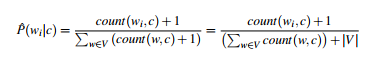

In [18]:
class MultinomialNaiveBayesC:
    def calculate_prior(self): 
        
        #P(y) is calculated
        P = np.zeros((self.n_classes_))
        _, self.dist = np.unique(self.y,return_counts=True)
        for i in range(self.classes_.shape[0]):
            P[i] = self.dist[i] / self.n_samples
        # print(P)
        return P
            
    def fit(self, X, y): 
        
        self.y = y
        self.n_samples, self.n_features = X.shape
        self.classes_ = np.unique(y)
        self.n_classes_ = self.classes_.shape[0]
        self.class_priors_ = self.calculate_prior()

        # print(self.n_samples, self.n_features) #1178 24614
        # print(self.classes_) #[0, 1]
        # print(self.n_classes_) #2
        # print(self.class_priors_) #Prior is calculated [0.4, 0.5]
        
        # distinct values in each features
        self.uniques = []
        for i in range(self.n_features):
            tmp = np.unique(X[:,i])
            self.uniques.append( tmp )
            
        self.N_yi = np.zeros((self.n_classes_, self.n_features)) # feature count
        self.N_y = np.zeros((self.n_classes_)) # total count 
        for i in self.classes_: # x axis
            indices = np.argwhere(self.y==i).flatten()
            columnwise_sum = []
            for j in range(self.n_features): # y axis
                columnwise_sum.append(np.sum(X[indices,j]))
                
            self.N_yi[i] = columnwise_sum # 2d
            self.N_y[i] = np.sum(columnwise_sum) # 1d
        # print(self.N_yi)
        # print(self.N_y)
            
    def calculate_probability(self, x_i, i, h):
        
        
        Nyi = self.N_yi[h,i]
        Ny  = self.N_y[h]
        
        numerator = Nyi + 1
        denominator = Ny + (1 * self.n_features)

        
        return  (numerator / denominator)**x_i
    
    def likelihood(self, x, h):
        
        tmp = []
        for i in range(x.shape[0]):
            tmp.append(self.calculate_probability(x[i], i,h))
        
        return np.prod(tmp)
    
    def predict(self, X):
        samples, features = X.shape
        self.predict_proba = np.zeros((samples,self.n_classes_))
        
        for i in range(X.shape[0]):
            joint_likelyhood = np.zeros((self.n_classes_))
            
            for h in range(self.n_classes_):
                joint_likelyhood[h]  = self.class_priors_[h] * self.likelihood(X[i],h) # P(y) P(X|y) 
                
            denominator = np.sum(joint_likelyhood)
            
            for h in range(self.n_classes_):
                numerator = joint_likelyhood[h]
                self.predict_proba[i,h] = (numerator / denominator)
            
        indices = np.argmax(self.predict_proba,axis=1)
        return self.classes_[indices]

In [19]:
%%time
mnb_model = MultinomialNaiveBayesC()
mnb_model.fit(X_train_tf, twenty_train.target)

CPU times: user 1min 1s, sys: 1.83 s, total: 1min 3s
Wall time: 1min 7s


In [20]:
X_test = count_vect.transform(twenty_test.data)
X_test_processed = tf_transformer.transform(X_test).toarray()
# print(type(X_test_processed))
yhat = mnb_model.predict(X_test_processed)
print("Accuracy for Test Set is",format(accuracy_score(twenty_test.target,yhat)*100,'.2f'),"%")

Accuracy for Test Set is 94.90 %


We also check sklearn Naive Bayes for Accuracy and time taken to process.With sklearn library Accuracy is higher and time taken is less

In [21]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tf, twenty_train.target)

In [22]:
docs_new = ['being on the computer is slow', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)
for doc, category in zip(docs_new, predicted):
  print('%r => %s' % (doc, twenty_train.target_names[category]))

'being on the computer is slow' => comp.graphics
'OpenGL on the GPU is fast' => comp.graphics


In [23]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),
])
text_clf.fit(X_train, twenty_train.target)
X_test = twenty_test.data
predicted = text_clf.predict(X_test)
print("Accuracy for Test Set is",format(np.mean(predicted == twenty_test.target)*100,'.2f'),"%")

Accuracy for Test Set is 95.80 %


### Exercise 2: Implementing SVM Classifier via Scikit-Learn

In [24]:
text_clf = Pipeline([
     ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(gamma='auto',kernel='linear'))])

text_clf.fit(X_train, twenty_train.target)
predicted = text_clf.predict(X_test)
print("Accuracy for Test Set is",format(np.mean(predicted == twenty_test.target)*100,'.2f'),"%")

Accuracy for Test Set is 95.29 %


This is to tune the hyperparameters used in SVM like kernel and gamma value

In [25]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'clf__kernel': ('linear','poly','rbf','sigmoid'),
    'clf__gamma': ('auto','scale')
 }

In [26]:
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)

In [27]:
gs_clf = gs_clf.fit(X_train, twenty_train.target)

In [28]:
twenty_train.target_names[gs_clf.predict(['OpenGL on the GPU is fast'])[0]]

'comp.graphics'

In [29]:
print(gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
  print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

0.9872628921745402
clf__gamma: 'auto'
clf__kernel: 'linear'


In [30]:
print(gs_clf.cv_results_)

{'mean_fit_time': array([1.33171048, 1.45273895, 1.47158251, 1.47776217, 1.33391962,
       1.48868847, 1.45757523, 1.12304711]), 'std_fit_time': array([0.04401106, 0.03245346, 0.04002974, 0.02648169, 0.03496867,
       0.02901919, 0.02778567, 0.1176765 ]), 'mean_score_time': array([0.22276292, 0.3155786 , 0.37759404, 0.30970058, 0.22398062,
       0.3143434 , 0.34250135, 0.18782182]), 'std_score_time': array([0.01297518, 0.02395186, 0.0278854 , 0.01637818, 0.01535649,
       0.01150216, 0.02253468, 0.02555125]), 'param_clf__gamma': masked_array(data=['auto', 'auto', 'auto', 'auto', 'scale', 'scale',
                   'scale', 'scale'],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_clf__kernel': masked_array(data=['linear', 'poly', 'rbf', 'sigmoid', 'linear', 'poly',
                   'rbf', 'sigmoid'],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?

After using the best hyperparameters obtained from GridSearchCV

In [31]:
text_clf = Pipeline([
     ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(gamma=gs_clf.best_params_['clf__gamma'],kernel=gs_clf.best_params_['clf__kernel']))])


text_clf.fit(X_train, twenty_train.target)
predicted = text_clf.predict(X_test)
print("Accuracy for Test Set is",format(np.mean(predicted == twenty_test.target)*100,'.2f'),"%")

Accuracy for Test Set is 95.29 %


###### https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
###### https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#training-a-classifier 
###### https://www.kaggle.com/riyadhrazzaq/multinomial-naive-bayes-from-scratch
###### https://medium.com/@johnm.kovachi/implementing-a-multinomial-naive-bayes-classifier-from-scratch-with-python-e70de6a3b92e